         SO2        NO2         O3      PM2.5       PM10
0  12.066771  26.209577  50.274385  30.133367  49.601856
1   9.960118  26.414410  50.725530  39.431072  63.532406
2  13.042188  28.175000  59.656341  30.048178  51.604358
3  14.110423  30.427946  45.042525  35.744039  59.892717
4  16.469369  25.970691  46.352582  22.802231  39.986833
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     3347 non-null   float64
 1   NO2     3347 non-null   float64
 2   O3      3347 non-null   float64
 3   PM2.5   3347 non-null   float64
 4   PM10    3347 non-null   float64
dtypes: float64(5)
memory usage: 130.9 KB
None
               SO2          NO2           O3        PM2.5         PM10
count  3347.000000  3347.000000  3347.000000  3347.000000  3347.000000
mean     15.457743    30.233894    49.046178    30.840341    53.068965
std       7.958836     9.840362  

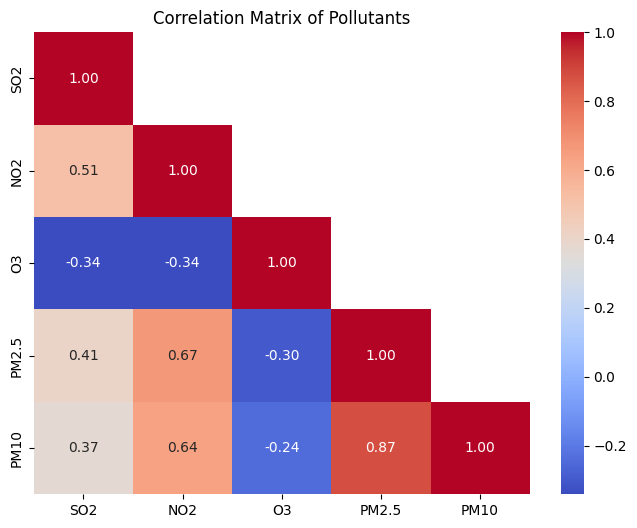

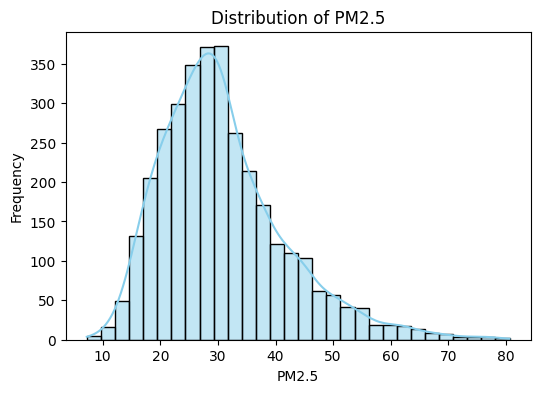

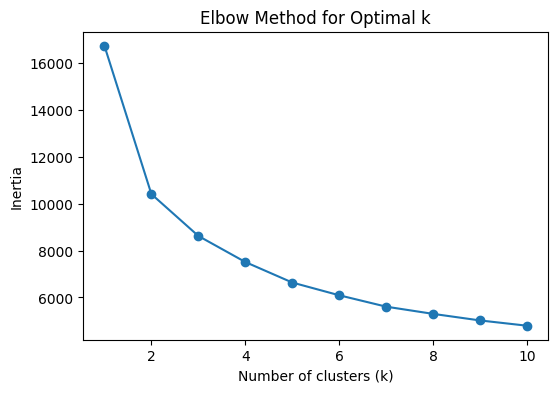

Cluster
2    1503
1    1313
0     531
Name: count, dtype: int64


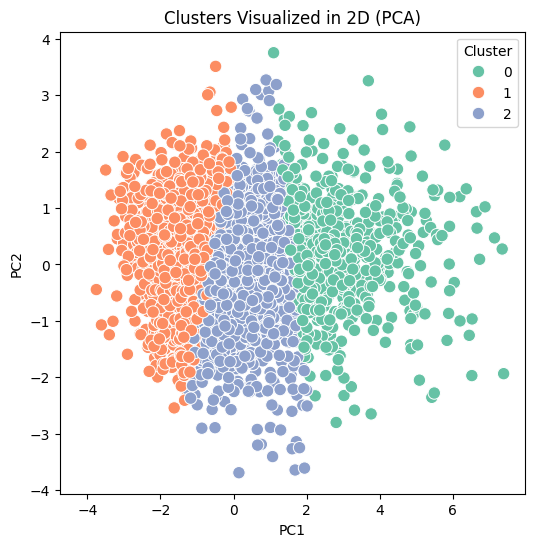

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel("airpoll spreadsheet.xlsx")  
print(df.head())
print(df.info())

# Descriptive statistics
desc_stats = df.describe()
print(desc_stats)

# Descriptive stats for Excel
desc_stats.to_excel("descriptive_statistics.xlsx")

# Correlation matrix
corr_matrix = df.corr()

# Heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, )
plt.title("Correlation Matrix of Pollutants")
plt.show()

# Distribution plots

plt.figure(figsize=(6,4))
sns.histplot(df["PM2.5"], kde=True, bins=30, color="skyblue")
plt.title(f"Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

# Standardize data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Optimal k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_data)

print(df["Cluster"].value_counts())

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(6,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1],
                hue=df["Cluster"], palette="Set2", s=80)
plt.title("Clusters Visualized in 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# New dataset with clusters
df.to_excel("airpoll_spreadsheet.xlsx", index=False)